### 1. Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

clients = pd.read_csv('../data/processed/clients.csv')
orders = pd.read_csv('../data/processed/orders.csv')
clients_monthly = pd.read_csv('../data/processed/clients_monthly.csv')

### 2. Data Overview

In [2]:
print("Clients DataFrame:")
print(clients.info())
print("Orders DataFrame:")
print(orders.info())
print("Clients Monthly DataFrame:")
print(clients_monthly.info())

# Distribution of Efficient vs. Inefficient Clients
print("\nDistribution of Efficient vs. Inefficient Clients:")
efficient_clients = clients[clients['class'].str.contains('Efficient')]
inefficient_clients = clients[clients['class'].str.contains('Inefficient')]

total_clients = len(clients)
efficient_percentage = (len(efficient_clients) / total_clients) * 100
inefficient_percentage = (len(inefficient_clients) / total_clients) * 100

print(f"Efficient Clients: {len(efficient_clients)} ({efficient_percentage:.2f}%)")
print(f"Inefficient Clients: {len(inefficient_clients)} ({inefficient_percentage:.2f}%)")

# Distribution of Clients by Class
print("\nDistribution of Clients by Class:")
class_distribution = clients['class'].value_counts()
class_percentage = clients['class'].value_counts(normalize=True) * 100

for client_class, count in class_distribution.items():
    percentage = class_percentage[client_class]
    print(f"- {client_class}: {count} ({percentage:.2f}%)")


Clients DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41950 entries, 0 to 41949
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   client_id               41950 non-null  int64  
 1   city                    41950 non-null  object 
 2   channel                 41950 non-null  object 
 3   promotor_id             41950 non-null  int64  
 4   frequency               41950 non-null  float64
 5   efficiency              41950 non-null  float64
 6   efficiency_scaled       41950 non-null  float64
 7   total_orders            41950 non-null  int64  
 8   total_volume            41950 non-null  float64
 9   total_income            41950 non-null  float64
 10  total_cost              41950 non-null  int64  
 11  total_profit            41950 non-null  float64
 12  median_ticket           41950 non-null  float64
 13  median_ticket_min       41950 non-null  float64
 14  median_ticket_max  

### 3. Target Variable Analysis

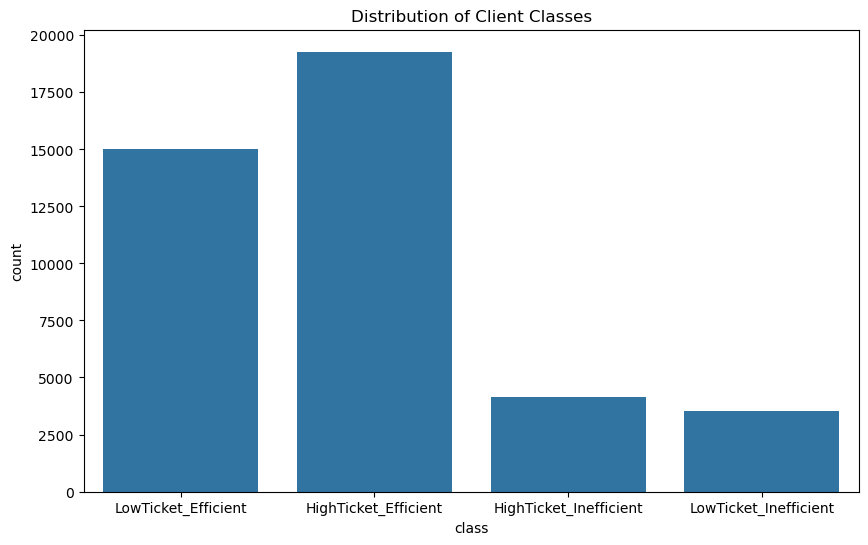

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=clients)
plt.title('Distribution of Client Classes')
plt.show()

The `class` column is the target variable for classification models. It is created based on the `median_ticket` and `efficiency` of the clients. The distribution of the classes is imbalanced, with the majority of clients being in the "HighTicket_Efficient" and "LowTicket_Efficient" classes.

### 4. Efficiency Analysis

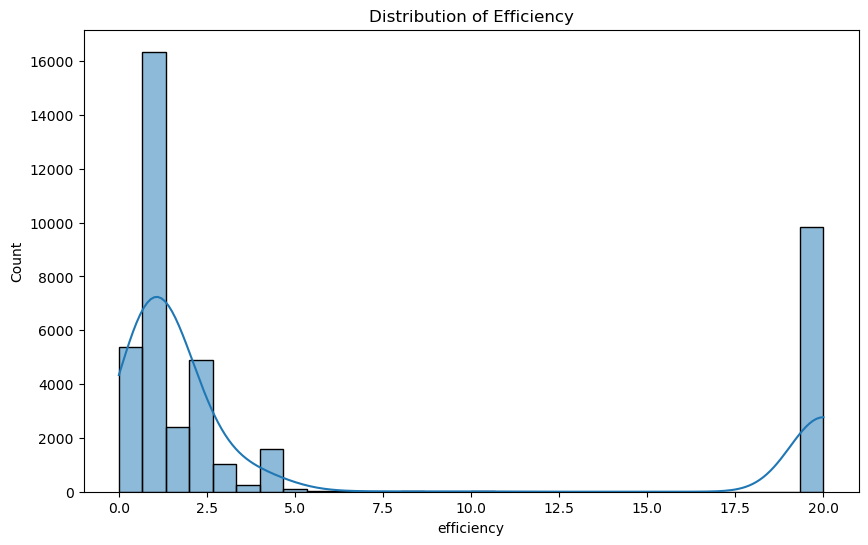

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(clients['efficiency'], bins=30, kde=True)
plt.title('Distribution of Efficiency')
plt.show()

The `efficiency` is a key feature used to create the `class` target variable. It is calculated as the ratio of total orders to total promotor visits. The distribution of efficiency is skewed to the right, with a long tail of highly efficient clients.

### 5. Correlation Analysis

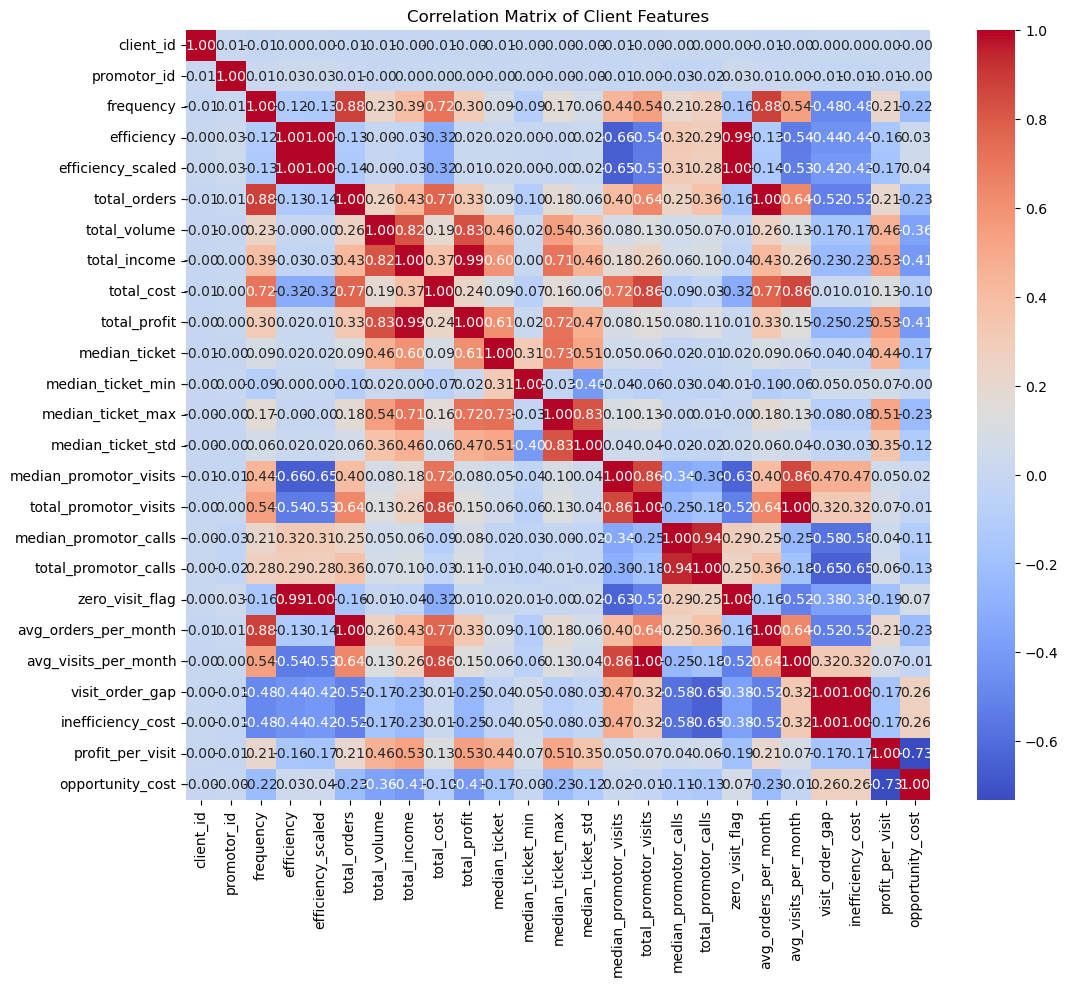

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(clients.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Client Features')
plt.show()

The correlation matrix shows the relationships between the different features in the `clients` dataframe. There are strong positive correlations between `total_orders`, `total_volume`, `total_income`, and `total_profit`. There is also a strong positive correlation between `total_promotor_visits` and `total_cost`.

### 6. Numerical Feature Distribution

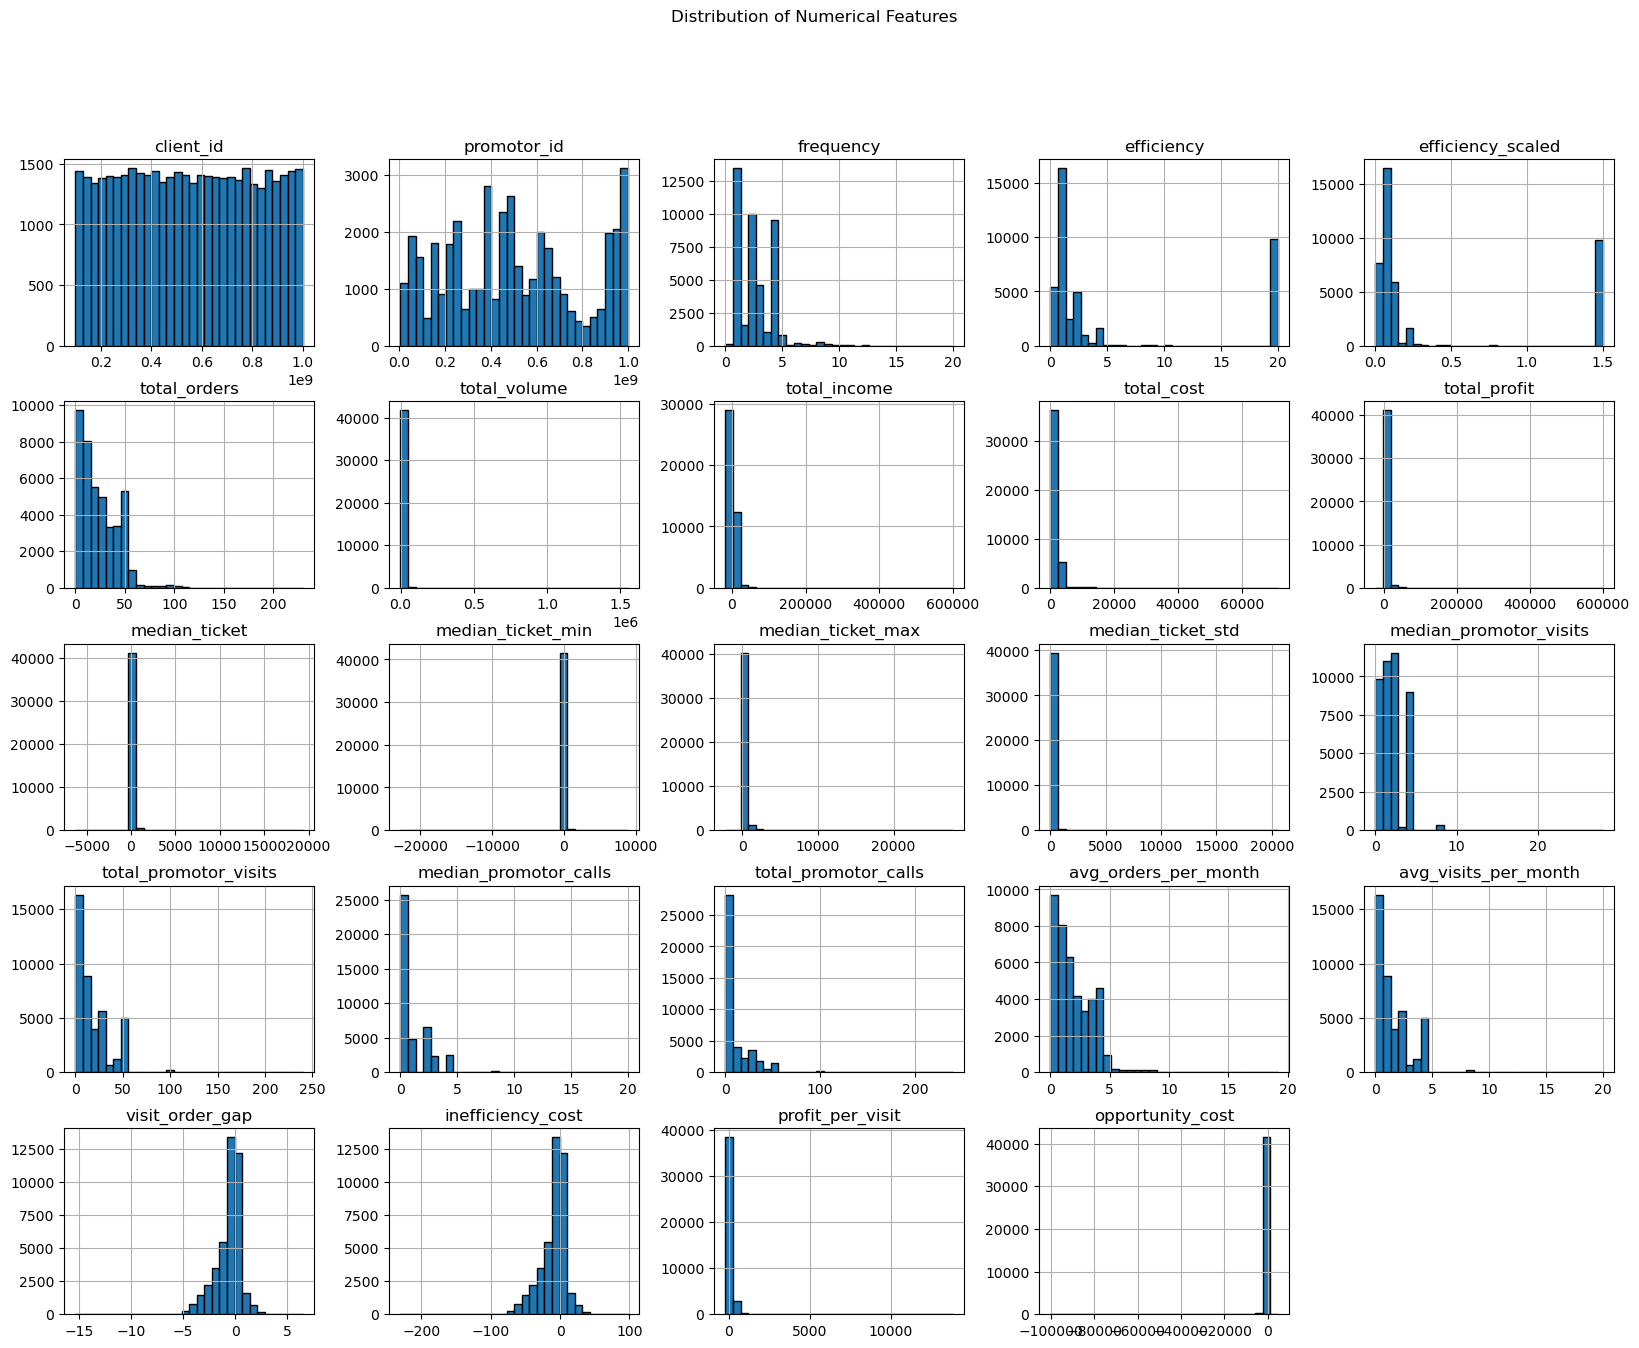

In [6]:
clients.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

### 7. Analysis of Promotor Visits and Visit-Order Gap

#### Distribution of Median Promotor Visits

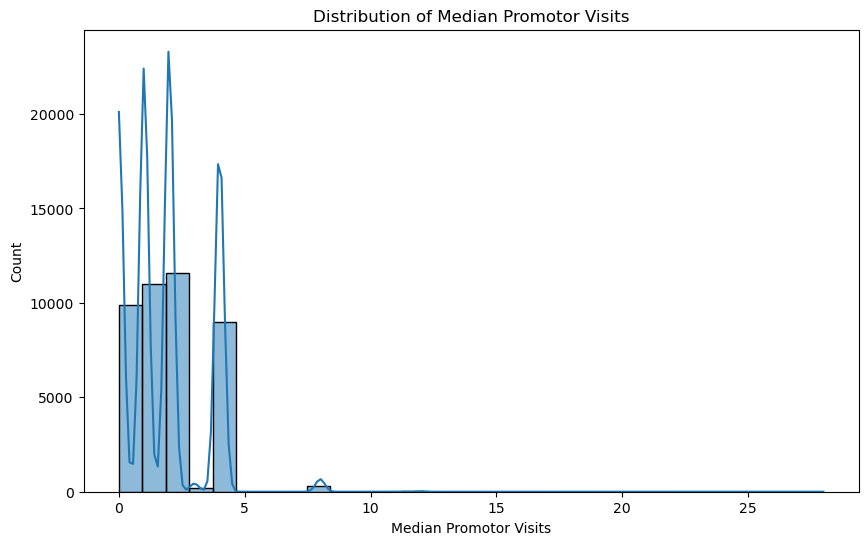

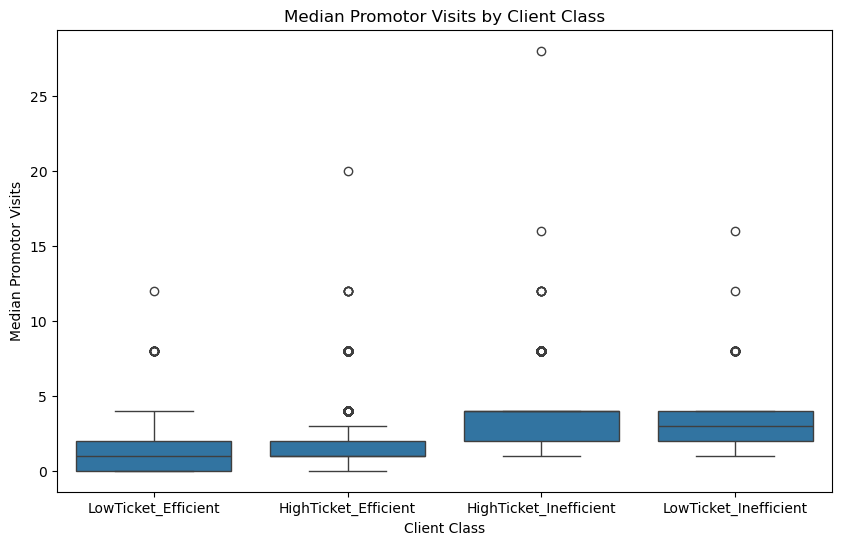

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(clients['median_promotor_visits'], bins=30, kde=True)
plt.title('Distribution of Median Promotor Visits')
plt.xlabel('Median Promotor Visits')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='median_promotor_visits', data=clients)
plt.title('Median Promotor Visits by Client Class')
plt.xlabel('Client Class')
plt.ylabel('Median Promotor Visits')
plt.show()

The `median_promotor_visits` feature represents the median number of visits a promotor makes to a client. Analyzing its distribution and relationship with client classes can reveal insights into client engagement and promotor activity. The box plot helps visualize how this metric varies across different client segments.

#### Distribution of Visit-Order Gap

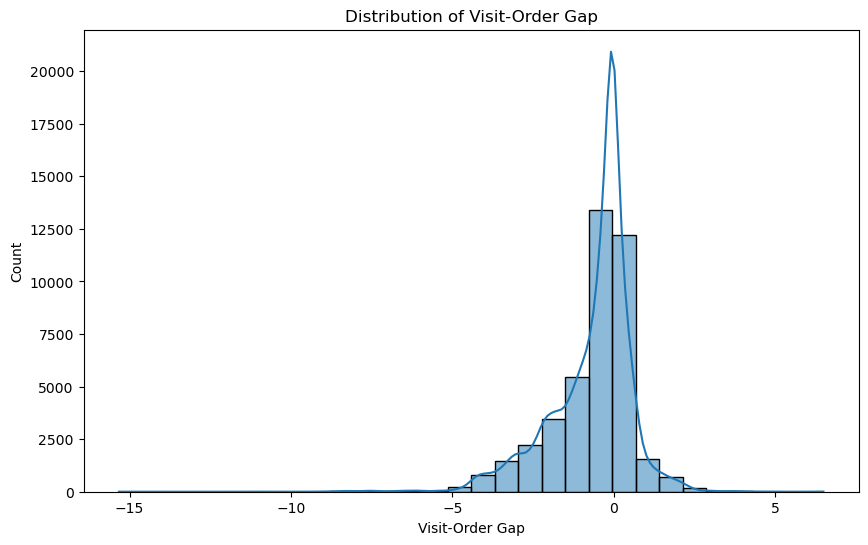

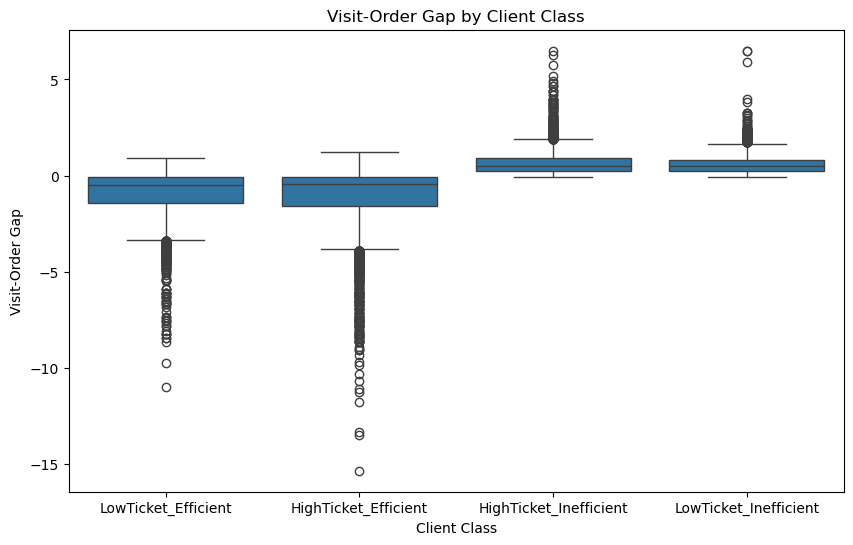

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(clients['visit_order_gap'], bins=30, kde=True)
plt.title('Distribution of Visit-Order Gap')
plt.xlabel('Visit-Order Gap')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='visit_order_gap', data=clients)
plt.title('Visit-Order Gap by Client Class')
plt.xlabel('Client Class')
plt.ylabel('Visit-Order Gap')
plt.show()

The `visit_order_gap` feature likely indicates the time or activity gap between a promotor visit and a client placing an order. Understanding its distribution and how it relates to client classes can provide valuable information about the effectiveness of promotor visits and potential areas for improvement in client conversion or retention.

### 8. Categorical Feature Analysis

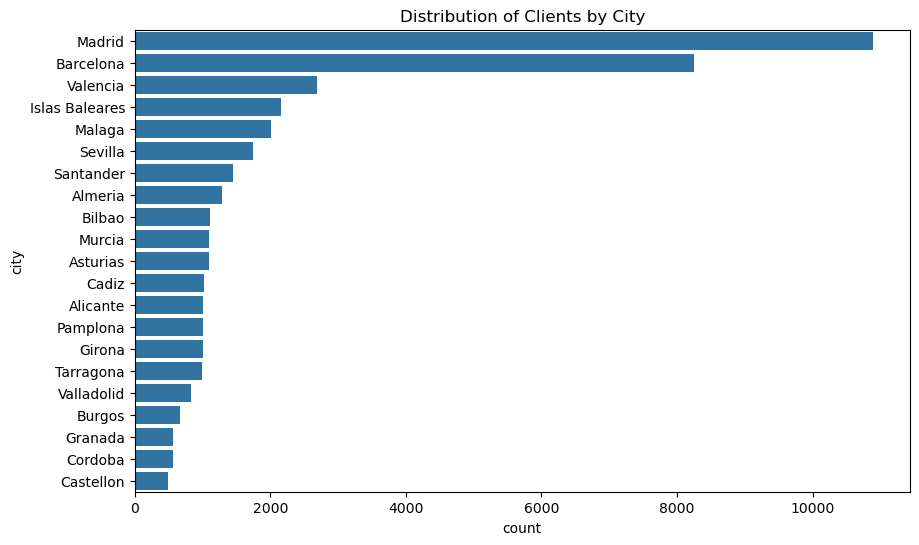

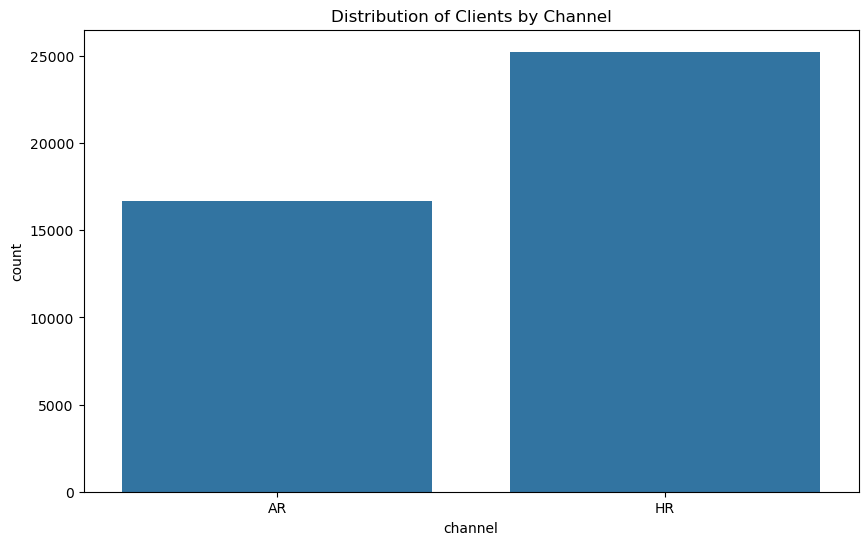

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(y='city', data=clients, order = clients['city'].value_counts().index)
plt.title('Distribution of Clients by City')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='channel', data=clients)
plt.title('Distribution of Clients by Channel')
plt.show()

### 9. Relationship between Features and Target Variable

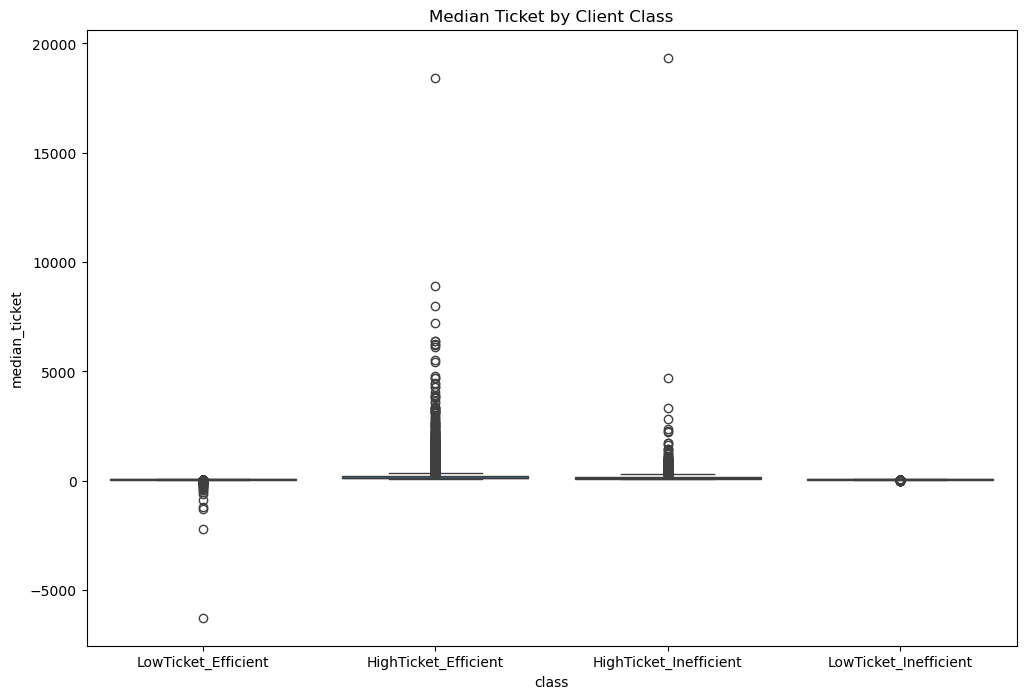

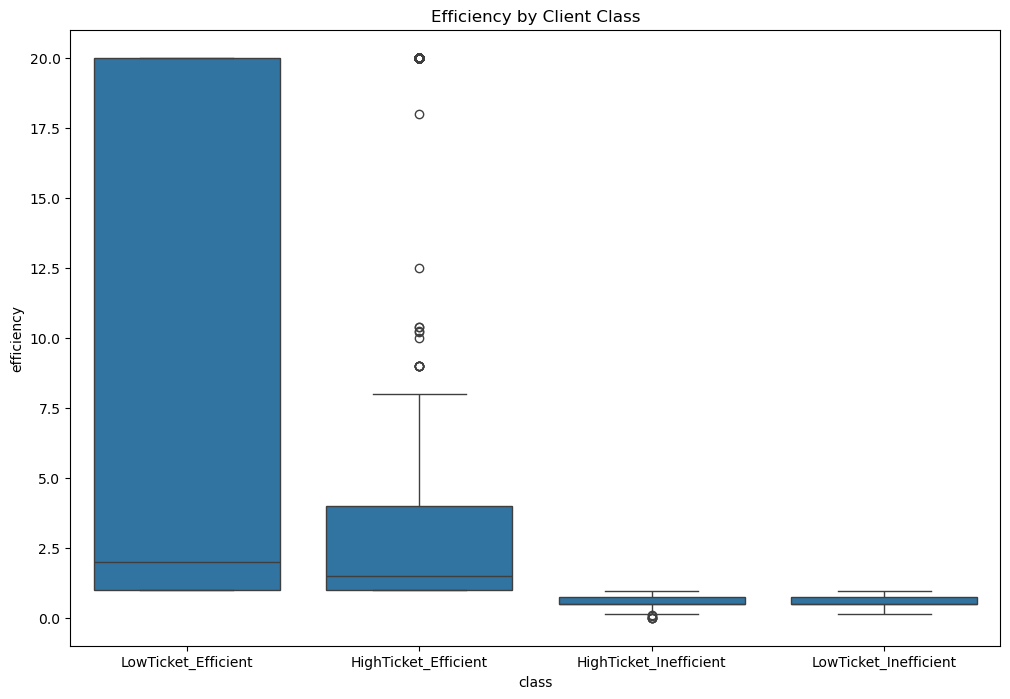

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='class', y='median_ticket', data=clients)
plt.title('Median Ticket by Client Class')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='class', y='efficiency', data=clients)
plt.title('Efficiency by Client Class')
plt.show()

### 10. Time Series Analysis

/var/folders/7g/6kr_1n9j1s9bs3f1h97xqlnr0000gn/T/ipykernel_80775/2420411185.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders['number_of_orders'].resample('M').sum().plot()


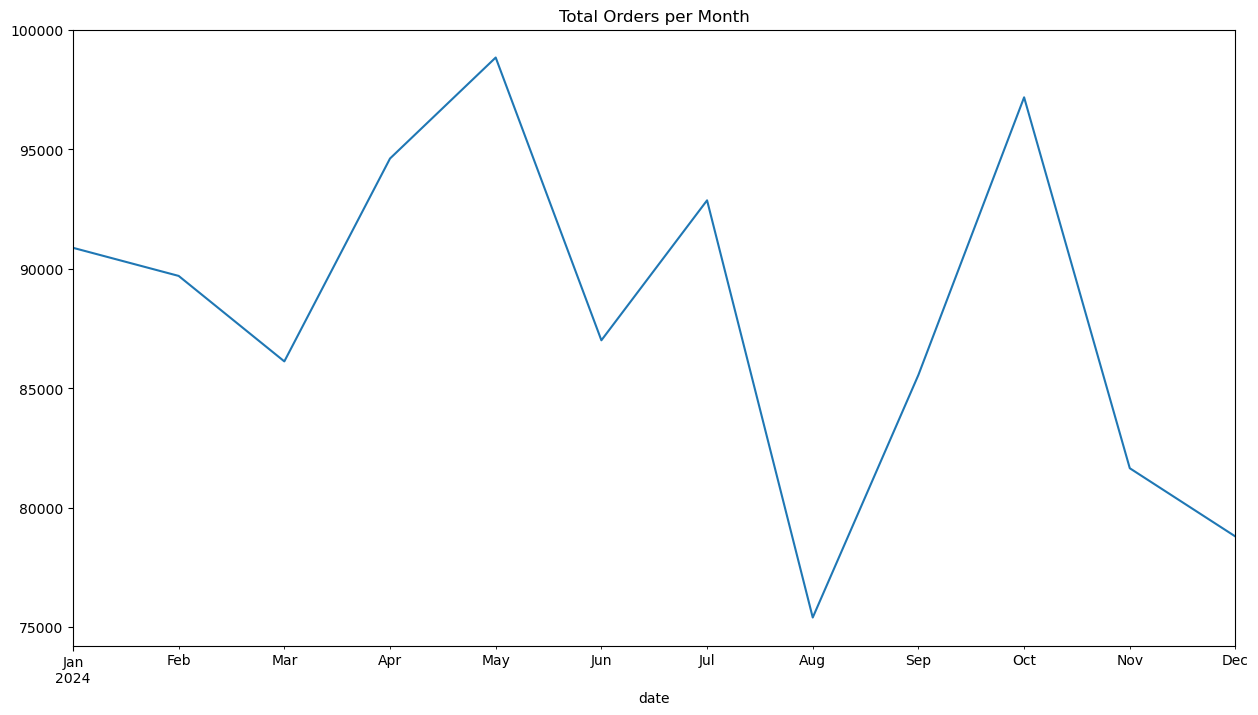

/var/folders/7g/6kr_1n9j1s9bs3f1h97xqlnr0000gn/T/ipykernel_80775/2420411185.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders['income'].resample('M').sum().plot()


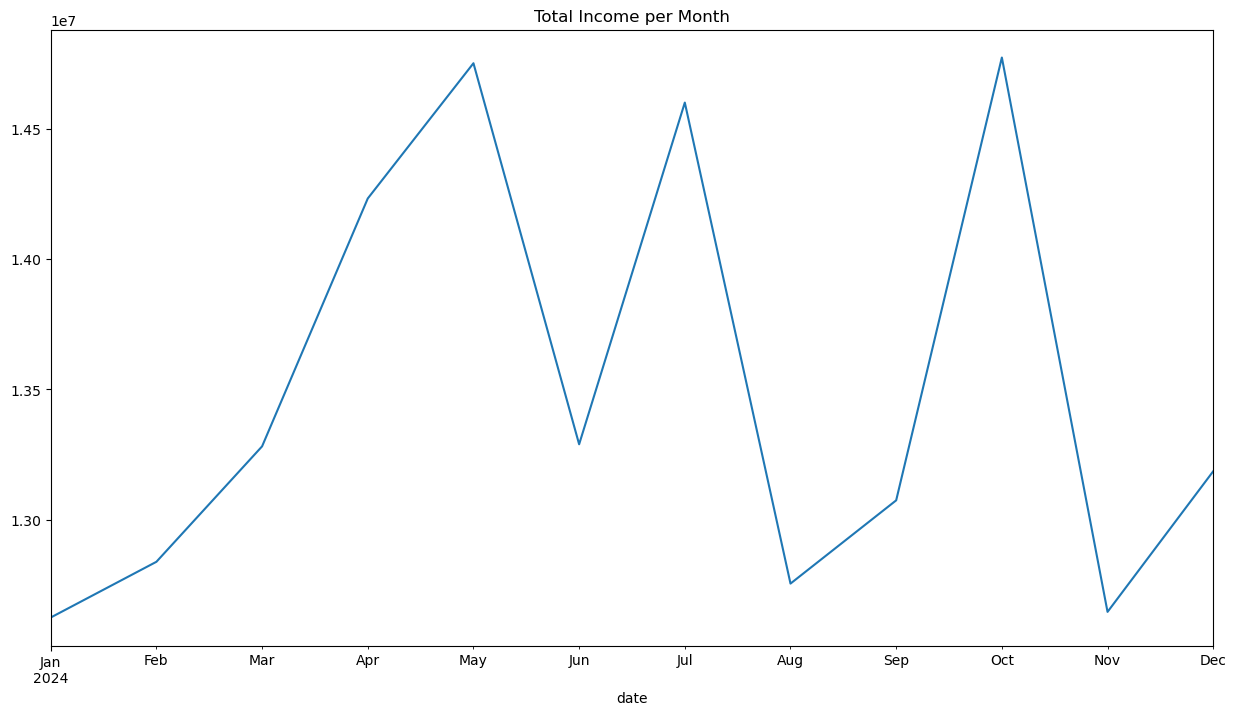

In [11]:
orders['date'] = pd.to_datetime(orders['date'])
orders.set_index('date', inplace=True)

plt.figure(figsize=(15, 8))
orders['number_of_orders'].resample('M').sum().plot()
plt.title('Total Orders per Month')
plt.show()

plt.figure(figsize=(15, 8))
orders['income'].resample('M').sum().plot()
plt.title('Total Income per Month')
plt.show()